In [1]:
import numpy as np 
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

In [3]:
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [4]:
train_file = "C:/Dataset/train.csv"
raw_data = pd.read_csv(train_file)
print(raw_data.shape)
X, y = data_prep(raw_data)
print(X.shape)

(42000, 785)
(42000, 28, 28, 1)


In [5]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                247872    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [6]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])
model.fit(X, y,
          batch_size = 128,
          epochs = 6,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/6
33600/33600 [==============================] - 9s 270us/sample - loss: 0.3303 - accuracy: 0.9029 - val_loss: 0.1064 - val_accuracy: 0.9687
Epoch 2/6
33600/33600 [==============================] - 8s 250us/sample - loss: 0.0999 - accuracy: 0.9701 - val_loss: 0.0659 - val_accuracy: 0.9802
Epoch 3/6
33600/33600 [==============================] - 9s 256us/sample - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.0563 - val_accuracy: 0.9825
Epoch 4/6
33600/33600 [==============================] - 8s 239us/sample - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0539 - val_accuracy: 0.9821
Epoch 5/6
33600/33600 [==============================] - 8s 244us/sample - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 6/6
33600/33600 [==============================] - 8s 239us/sample - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0499 - val_accuracy: 0.9862


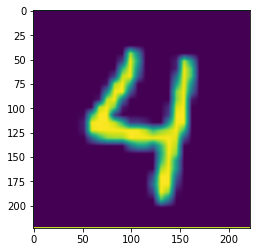

(223, 222)


In [16]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import image
img = 'Downloads/mnistimg.png'
#img = r"C:\Users\lucid\Downloads\canvas-img (3).png"
#image = image.imread(img)
#image = image[:, :, 0]
image = cv2.imread(img, 0)
plt.imshow(image)
plt.show()
print(image.shape)

In [17]:
dim = (28, 28)
image = cv2.resize(image, dim)
image = np.reshape(image, (-1, 28, 28, 1))
#plt.imshow(image)
#plt.show()
#print(image.shape)
model.predict(image)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
#model.save('mnist.h5')